## Project : Personal loan campaign modelling for bank


### contex

### Objective

-To predict whether a liability customer will buy a personal loan or not.

-Which variables are most significant.

-Which segment of customers should be targeted more.

### Reason for doing this project
#For identifying customers who were actually interested in accepting personal loan from the bank but were #predicted not interested by the model. This analysis would allow the bank to identify the ‘False Negative’ clients. In our situation where the target variable, Personal Loan was predicted by the model to not accept a loan, when in fact they did.

Such an impact could be costly to the bank. As customer churn would result in greater costs to the bank to acquire a new customer. Such costs would include the digital marketing initiatives taken by members (e-mails, radio infomercials, and TV adverts) and evaluating a customer for a long period of time to monitor their spending habits before new products can be offered.


### Information on the features 

In [ ]:
Data Dictionary

ID: Customer ID Age: Customer’s age in completed years

Experience: years of professional experience

Income: Annual income of the customer (in thousand dollars)

ZIP Code: Home Address ZIP code.

Family: the Family size of the customer

CCAvg: Avg. spending on credit cards per month (in thousand dollars)

Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional

Mortgage: Value of house mortgage if any. (in thousand dollars)

Personal_Loan: Did this customer accept the personal loan offered in the last campaign?

Securities_Account: Does the customer have securities account with the bank?

CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?

Online: Do customers use internet banking facilities?

CreditCard: Does the customer use a credit card issued by Bank?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")
sns.set()

from scipy.stats import zscore
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

In [2]:
import pandas as pd 
df = pd.read_csv('Loan_Modelling.csv')
df

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [3]:
df['Personal_Loan'].value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

In [4]:
df.shape

(5000, 14)

In [5]:
df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Description:

Average age of customer in given data set is 45.34

Average experience of customers in years is 20.10 years. But experience Variable has -ve values which is not correct, this need to be fixed

Average income of customer in dollars is 73.77K

Average family size is 2.4

Average amount spent by customer on credit cart in dollars is 1.93K

On an average most of the customer are Under graduate or graduate

Average house loan(mortgage) customer availed in dollars is 56.5K

For variables: Income, CCAvg, Experience, Mortgage, Security_Account,CD_Accounts,CreditCard has big difference between mean Vs Max values, which suggest that there are some extreme values or possible outliers

In [6]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

Data doesn't contain any null values so now lets find either they are in proper datatypes or not

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


We see that data is perfectly engineered, all the columns are named perfectly with no space, dots or dashes
Each variable is in proper datatype

In [8]:
#finding unique data
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

#### On the basis of number of unique values we can seperate the continuous and categorical data

In [52]:
categorical_variables=[col for col in df.columns if df[col].nunique()<=5]
print(categorical_variables)
continuous_variables=[col for col in df.columns if df[col].nunique()>5]
print(continuous_variables)

['Family', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'CCAvg', 'Mortgage']


We will remove the Personal Loan from categorical variable list as it is the target variable (Dependent Variable) and ID from the continuous variable list as it doesn't take part in data modeling

In [53]:
categorical_variables.remove("Personal_Loan")
print(categorical_variables)
continuous_variables.remove("ID")
print(continuous_variables)

['Family', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
['Age', 'Experience', 'Income', 'ZIPCode', 'CCAvg', 'Mortgage']


### Data Visualization

In [54]:
df['Personal_Loan'].value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

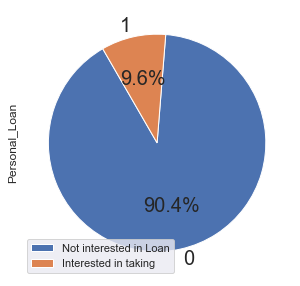

In [55]:
fig,ax = plt.subplots( figsize=(7,5) )
df['Personal_Loan'].value_counts(sort=False).plot(kind='pie',autopct='%1.1f%%', fontsize= 20,startangle=120)
plt.legend(['Not interested in Loan','Interested in taking  '])
plt.show()

#### Univariate Analysis

##### Analysing the distribution of particular attributes

#### Continuous variable

C:\Users\sachn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sachn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sachn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

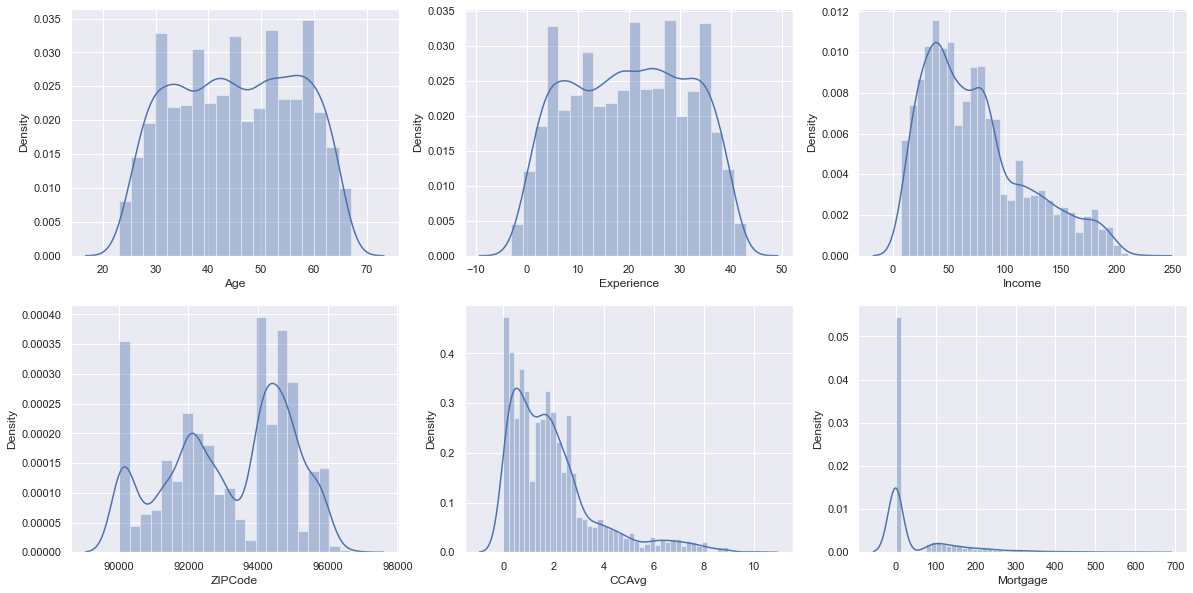

In [12]:
fig=plt.figure(figsize=(20,10))
#fig.subplots_adjust(wspace=0.4,hspace=0.4)
for i,col in enumerate(continuous_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.distplot(df[col])

1.We can see that Age and Experience are uniformaly distributed and show a good similarities in distribution.

2.Income, CCAvg, Mortgage are positive Skew

3.ZIP code is negative Skew or it contain values from single region.

4.Mortgage contain most of the values as 0

### Categorical variables

C:\Users\sachn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sachn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sachn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sachn\anaconda3\lib\si

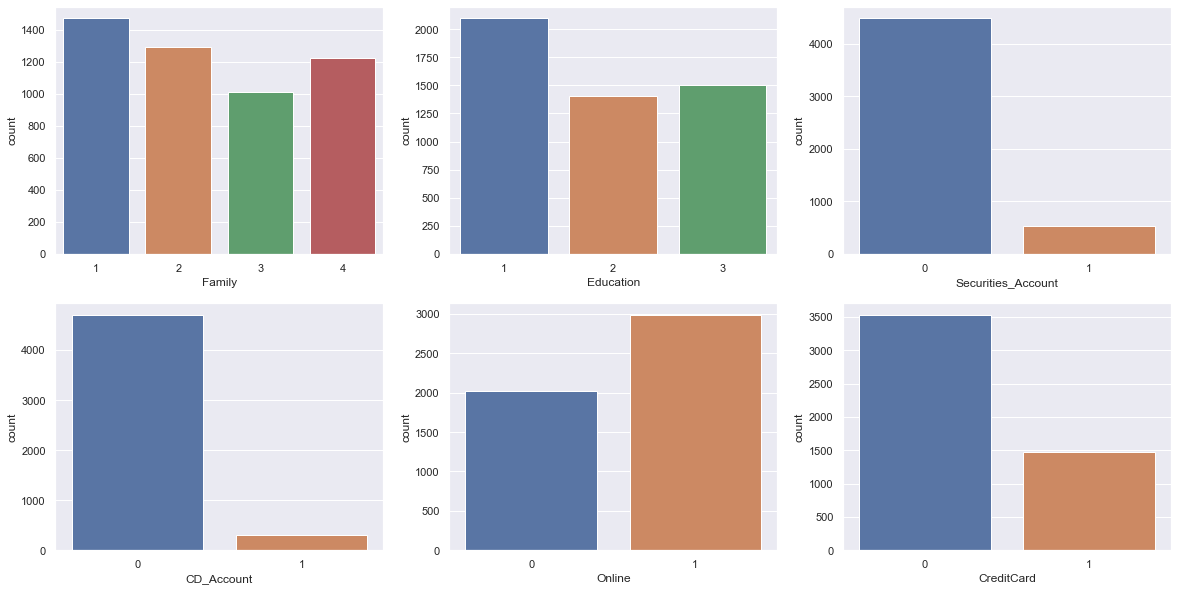

In [13]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(categorical_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.countplot(df[col])

1.Most of the customer doesn't have Securities Account, CD Account and CreditCard

2.More number of customer use internet banking facilities.

3.More number of customer are Undergrad and have family size one.

### Bivariate Analysis

Analysing each column (Independent Attribute) first in regard with Personal Loan (Dependent attribute) and then relating them with one another for finding patterns in data

#### Continious Variables

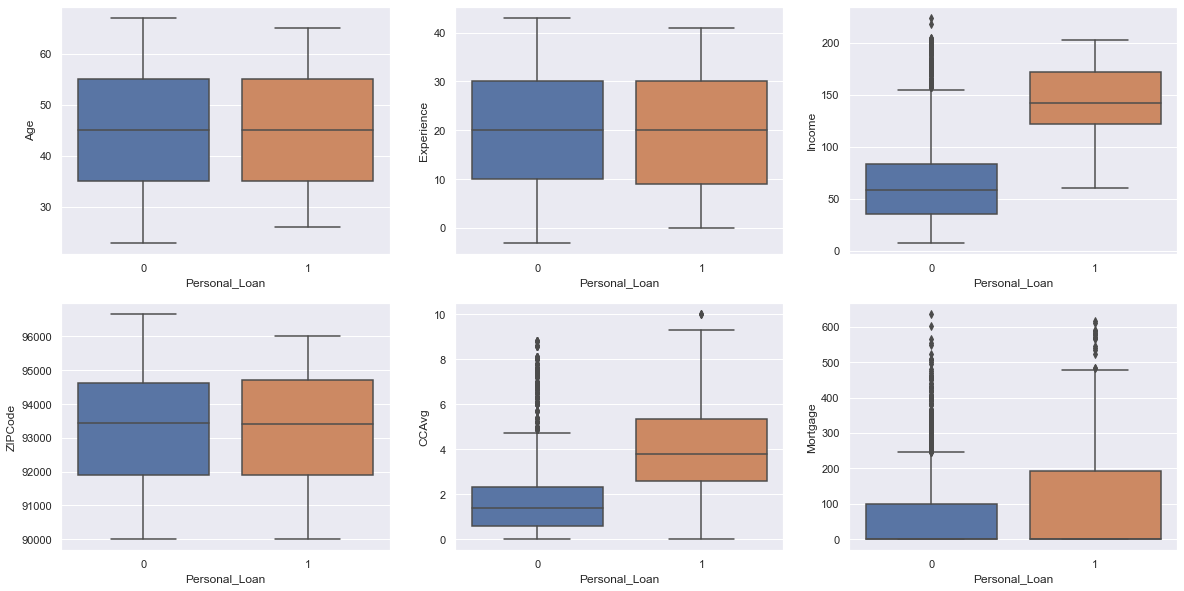

In [14]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(continuous_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.boxplot(y=df[col],x=df['Personal_Loan'])

C:\Users\sachn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sachn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sachn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

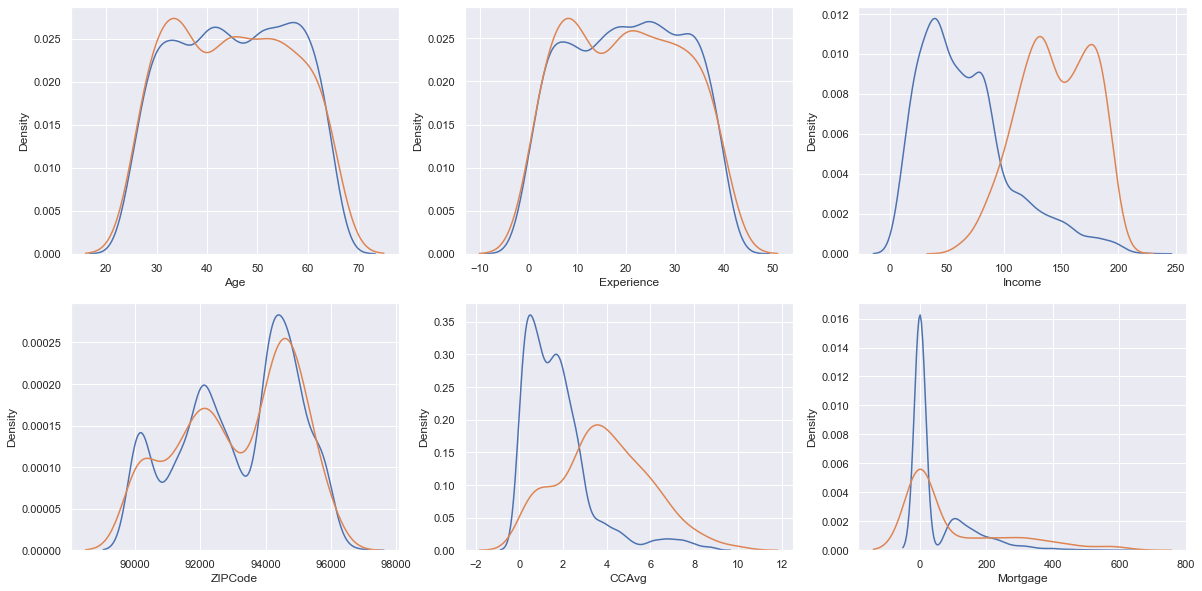

In [15]:
#distplot of personal_loan with continuous variables.
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(continuous_variables):
    ax=fig.add_subplot(2,3,i+1)
    ax1=sns.distplot(df[col][df['Personal_Loan']==0],hist=False,label='No Personal Lone')
    sns.distplot(df[col][df['Personal_Loan']==1],hist=False,ax=ax1,label='Personal Lone')

1.Personal Loan doesn't show variations with Age and Experience.

2.Income has a good effect on Personal Loan Customers with High Income have more chances of having Personal Loan.

3.CCAvg also show a good relationship with Personal Loan customers with personal loan have high Avg. spending on credit cards per month

4.Customers want to have high Mortgage have opted for Personal Loan

### Categorical Variable

Checking categorical variables with target

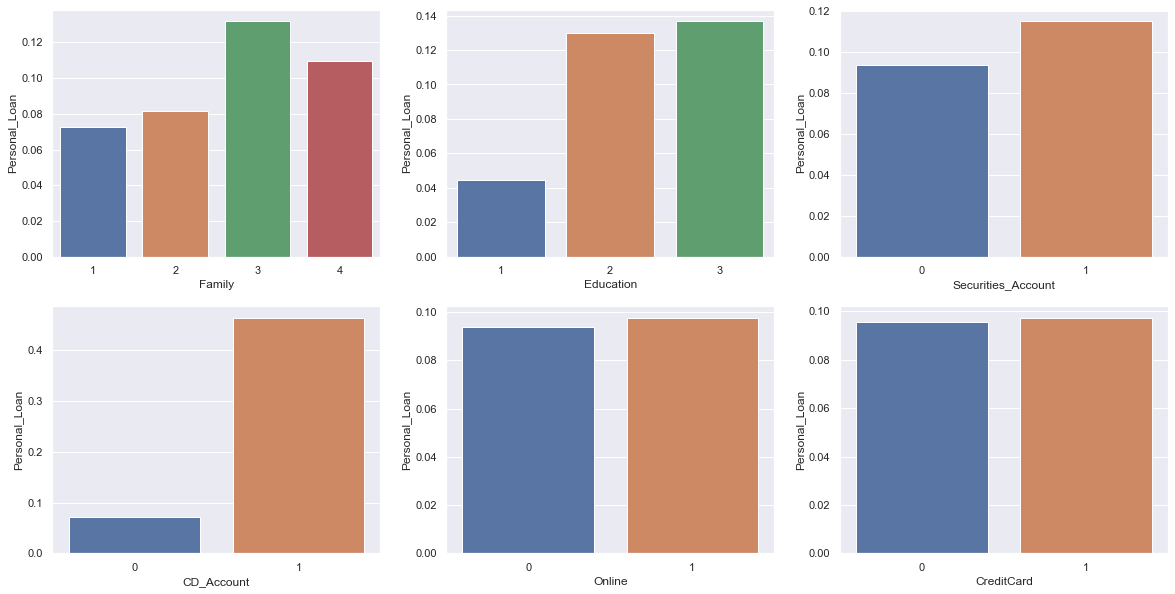

In [16]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(categorical_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.barplot(x=col,y='Personal_Loan',data=df,ci=None)

1.Customers with family size equal to 3 have more chances of having Personal Loan.

2.Customers with Undergrad degree have less chances of having Personal Loan as compaired to other customers having Graduate or Advanced/Professional degree

3.Customers with CD Account and Securities Account have more chances of having Personal Loan.

4.Customers using online Facitilies or not, having credit card or not doesn't effect much in chances of having Personal Loan

Income is a strong attribute which effect the chances of having Personl Loan High the Income High the chances of having Personal Loan. So we will analysise Income with other attributes

In [17]:
con=continuous_variables.copy()
con.remove('Income')

C:\Users\sachn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sachn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sachn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sachn\anacond

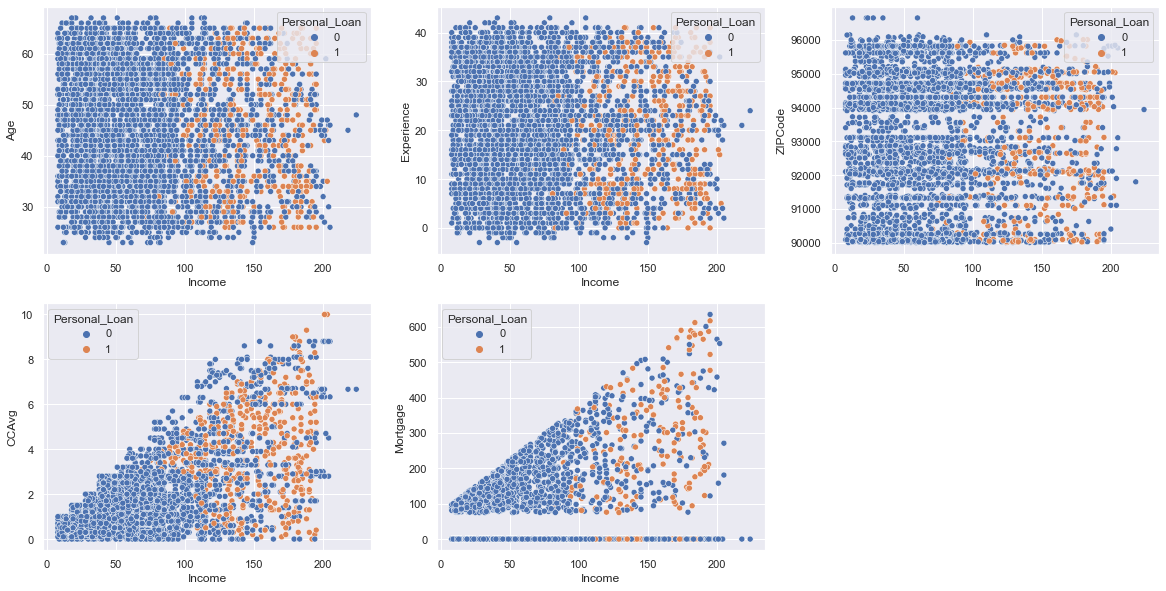

In [18]:
#scatterplot of continuous variable with income.
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(con):
    ax=fig.add_subplot(2,3,i+1)
    sns.scatterplot('Income',col,hue='Personal_Loan',data=df)

1.Age and Experience have not effect much as customer with high income no matter of what age group have chances of having Personal Loan.

2.ZIP Code shows that all the customers are of particular area and they have no pattern in chances of having personal loan.

3.Customers with high income and having personal loan shows high Avg. spending on credit cards per month and high Value of house mortgage

### Feature Engineering


Data Cleaning

In [56]:
df.drop_duplicates(inplace=True)

Since there are no duplicate enteries or row in data so we can set ID as index of dataframe

In [73]:
new_df['Education'] = new_df['Education'].astype(str)

In [74]:
new_df['Education']=new_df['Education'].str.replace('1' , 'undergraduate')
new_df['Education']=new_df['Education'].str.replace('2' , 'graduate')
new_df['Education']=new_df['Education'].str.replace('3' , 'advance')
new_df['Education']

0       undergraduate
1       undergraduate
2       undergraduate
3            graduate
4            graduate
            ...      
4995          advance
4996    undergraduate
4997          advance
4998         graduate
4999    undergraduate
Name: Education, Length: 5000, dtype: object

In [76]:
new_df['Online'] = new_df['Online'].astype(str)

In [77]:
new_df['Online']=new_df['Online'].str.replace('0' , 'yes')
new_df['Online']=new_df['Online'].str.replace('1' , 'no')

In [78]:
new_df

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,undergraduate,0,0,1,0,yes,0
1,2,45,19,34,90089,3,1.5,undergraduate,0,0,1,0,yes,0
2,3,39,15,11,94720,1,1.0,undergraduate,0,0,0,0,yes,0
3,4,35,9,100,94112,1,2.7,graduate,0,0,0,0,yes,0
4,5,35,8,45,91330,4,1.0,graduate,0,0,0,0,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,advance,0,0,0,0,no,0
4996,4997,30,4,15,92037,4,0.4,undergraduate,85,0,0,0,no,0
4997,4998,63,39,24,93023,2,0.3,advance,0,0,0,0,yes,0
4998,4999,65,40,49,90034,3,0.5,graduate,0,0,0,0,no,0


In [20]:
df.set_index("ID",inplace=True)

Since ZIP Code doesn't show any effect on the chances of Personal Loan it is better to remove it form our data

In [21]:
df.drop('ZIPCode',axis=1,inplace=True)

Zip code contain data of particular area so it contain minimum variations so we removed it.

Finding relationship between Experience and Age

<AxesSubplot:title={'center':'Correlation'}>

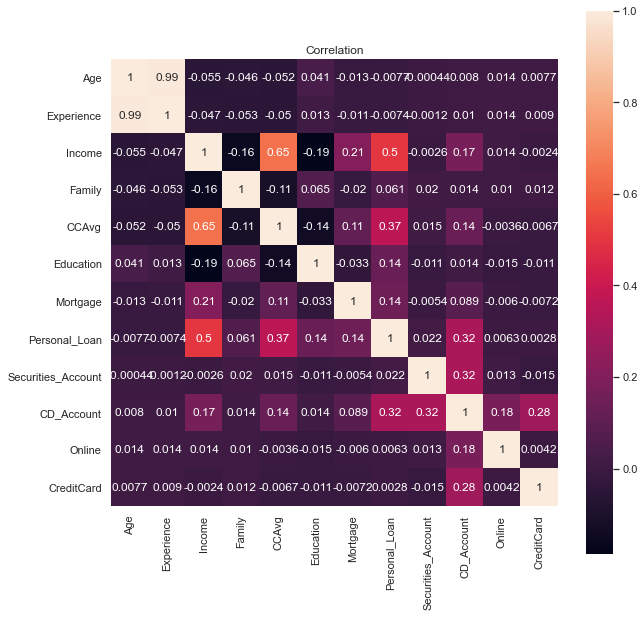

In [22]:
corr=df.corr()
plt.figure(figsize=(10,10))
plt.title('Correlation')
sns.heatmap(corr, annot=True, square=True)

In [23]:
df[['Age','Experience','Personal_Loan']].corr()

,Age,Experience,Personal_Loan
Age,1.000000,0.994215,-0.007726
Experience,0.994215,1.000000,-0.007413
Personal_Loan,-0.007726,-0.007413,1.000000


 Age shows a little better correlation with Personal loan we will drop the Experience attribute

In [ ]:
Box plot and KDE both show that an average population age lies between 25yrs to 50 yrs roughly, and the mean of the population is 38yrs. The left skewness in the KDE plot shows that more population was between 20 and 30 years and very few aged people were in the sample, which could be verified from the box plot too, as the box is aligned more towards the Q1 and not evenly distributed.
Here, the Barplot and Pie chart shows that “Course” Course_Type was highest in number with 51.3 % people subscribing to such courses, followed by “Program” Course_Type, with the least number of “Degree” Course_Type with only 0.3% subscribing to such courses.
In this example, sales are the target variable and correlation values that are most near to either +1 or -1 are most correlated with Sales. USer-Traffic in the orange color box has a correlation value of +0.8.
